# Project - Natural Language Processing Project-2     PART-2
 by ARYAN JAIN

#### SUMMARY

<b>Context:</b>
    Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.
    
    
<b>Data Description:</b>    
    The dataset is collected from two news websites, theonion.com and huffingtonpost.com. 
    
    Each record consists three attributes: article_link', 'headline' & 'is_sarcastic'
    
    is_sarcastic: 1 if the record is sarcastic otherwise 0
    

<b>Domain:</b>
 Social media analytics
    
    
<b>Objectives:</b>
    Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.
 
<b>Key Tasks:</b>
     
     - Read and explore the data 
     - Retain relevant columns
     - Get length of each sentence
     - Define parameters
     - Get indices for words
     - Create features and labels
     - Get vocabulary size
     - Create a weight matrix using GloVe embeddings
     - Define and compile a Bidirectional LSTM model
     - Fit the model and check the validation accuracy

## Import required libraries

#### Libraries for Data Management and Visualization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json

#### All tensorflow libraries

In [2]:
# the entire tensorflow
import tensorflow as tf

# Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

# Function to pad the inputs to a certain length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sequential model
from tensorflow.keras.models import Sequential

# Layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional

#### Scoring Metrics

In [3]:
from sklearn import metrics

#### Miscellaneous

In [4]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### Read and explore the data.

In [5]:
# Read dataset and investigate

In [6]:
# Defining function to load data from a json file
def load_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

In [7]:
# Reading in the data from the json file
sarcasm_data = list(load_data('Sarcasm_Headlines_Dataset.json'))

In [8]:
# Let's review few records 

sarcasm_data[0:5]

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [9]:
# As expected, each record has 3 attributes (or tags) - 'article_link', 'headline' & 'is_sarcastic'

    # Based on problem statement, we do not need article link, so I will ignore this attribute

In [10]:
# Let's see the total number of records we have
len(sarcasm_data)

26709

### Retain relevant columns

From the above three tags, for our task we dont need the 'article_link'. So we can ignore it and use the other two.

In [11]:
headline_data = []
labels = []

for entry in sarcasm_data:
    headline_data.append(entry['headline'])
    labels.append(entry['is_sarcastic'])

In [12]:
# Let's check the headlines
headline_data[0:10]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women",
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school, if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser for the ages"]

In [13]:
# Let's check the sarcasm flags for these headlines
labels[0:10]

[0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

In [14]:
# Determine the length

In [15]:
# Length for sentences

headline_length = []
for entry in headline_data:
    headline_length.append(len(entry.split()))

In [16]:
# Let's check length for few headlines

headline_length[0:10]

[12, 14, 14, 13, 11, 4, 7, 14, 7, 9]

In [17]:
# Let's visualize the lenth distribution

<AxesSubplot:ylabel='Density'>

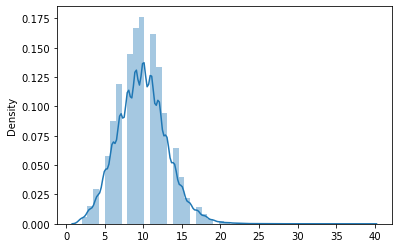

In [18]:
sns.distplot(headline_length)

In [19]:
# Print mean and standard deviation 

print (np.min(headline_length))
print (np.max(headline_length))
print (np.mean(headline_length))
print (np.std(headline_length))

2
39
9.845819761129208
3.1688955807394144


In [20]:
# Based on above analysis, almost all headlines seem to be less than 25 words. 

    # Just to get any rare words with more, I will use max length as 30 words, though few headlines
    # will still get omitted

In [21]:
# Defining parameters

In [22]:
# Initializing the parameters for the model

max_length = 30
embedd_dim = 100

In [23]:
# Split dataset for training, validation and testing

In [24]:
# Training dataset 
train_data = headline_data[:20000]
train_labels = labels[:20000]

# Validation dataset
validation_data = headline_data[20000:]
validation_labels = labels[20000:]

# Testing data
test_data = validation_data[6000:]
test_labels = validation_labels[6000:]

# Validation data
validation_data = validation_data[:6000]
validation_labels = validation_labels[:6000]

# Print
print(len(train_data))
print(len(train_labels))
print(len(validation_data))
print(len(validation_labels))
print(len(test_data))
print(len(test_labels))

20000
20000
6000
6000
709
709


In [25]:
# Get Indices for words & Vocabulary Size

In [26]:
# Tokenize the data 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(headline_data)
word_index = tokenizer.word_index

# Get Vocabulary size

len(word_index)

29656

In [27]:
# pad the training, validation and test data to the max length. We will do "post" padding ( default is "pre")
# convert to indexes using the above tokenizer

train_sequence = tokenizer.texts_to_sequences(train_data)  
train_sequence[0]

[307, 15114, 678, 3336, 2297, 47, 381, 2575, 15115, 5, 2576, 8433]

In [28]:
train_sequence_padded = pad_sequences(train_sequence, maxlen = max_length, padding = 'post', truncating='post') # truncate from the end if sentence exceeds max length
train_sequence_padded[0]

array([  307, 15114,   678,  3336,  2297,    47,   381,  2575, 15115,
           5,  2576,  8433,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0], dtype=int32)

In [29]:
train_sequence_padded.shape

(20000, 30)

In [30]:
# Execute above steps for validation and test datasets

In [31]:
validation_sequence = tokenizer.texts_to_sequences(validation_data)
validation_sequence_padded = pad_sequences(validation_sequence, maxlen = max_length, padding = 'post', truncating='post')
test_sequence = tokenizer.texts_to_sequences(test_data)
test_sequence_padded = pad_sequences(test_sequence, maxlen = max_length, padding = 'post', truncating='post')

In [32]:
# convert the above lists to numpy array for processing in Deep Learning models

train_sequence_padded = np.array(train_sequence_padded)
validation_sequence_padded = np.array(validation_sequence_padded)
test_sequence_padded = np.array(test_sequence_padded)
train_labels = np.array(train_labels)
validation_labels = np.array(validation_labels)
test_labels = np.array(test_labels)

In [33]:
# Create a weight matrix using GloVe embeddings

In [34]:
# loading the entire embedding into memory

embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

vocab_size = len(word_index)

# create a weight matrix for words in corpus
embedding_matrix = np.zeros((vocab_size + 1, embedd_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_matrix.shape

Loaded 400000 word vectors.


(29657, 100)

In [35]:
# Defining and compiling the bidirectional LSTM

In [36]:
model = Sequential()
model.add(Embedding(vocab_size + 1, embedd_dim, input_length=max_length, weights=[embedding_matrix])) 
model.add(Bidirectional(LSTM(units=64, return_sequences=True))) # 64 LSTM units
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units=32, return_sequences=True, recurrent_dropout=0.1))) # 32 LSTM units
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics="accuracy")
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           2965700   
_________________________________________________________________
bidirectional (Bidirectional (None, 30, 128)           84480     
_________________________________________________________________
dropout (Dropout)            (None, 30, 128)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 30, 64)            41216     
_________________________________________________________________
dense (Dense)                (None, 30, 256)           16640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 256)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 30, 128)           3

In [37]:
# The output dimension (30,1) seems in correct. 
    # The "return_sequences" probably needs to be false for the second LSTM for single input instead of 30 
    # This is because we doing binary classification. 
    
# This is an alternative model that I will try

In [38]:
model_1 = Sequential()
model_1.add(Embedding(vocab_size + 1, embedd_dim, input_length=max_length, weights=[embedding_matrix])) 
model_1.add(Bidirectional(LSTM(units=64, return_sequences=True,recurrent_dropout=0.1))) # 64 LSTM units
model_1.add(Bidirectional(LSTM(units=32, recurrent_dropout=0.1))) # 32 LSTM units
model_1.add(Dense(256, activation="relu"))
model_1.add(Dropout(0.2))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="sigmoid"))
model_1.compile(optimizer="Adam", loss="binary_crossentropy", metrics="accuracy")
print(model_1.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           2965700   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 30, 128)           84480     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [39]:
# Defining our callback and fitting the model

# Callback
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    verbose=1,
    restore_best_weights=True
)
# Fit the model
model.fit(train_sequence_padded, train_labels, validation_data=(validation_sequence_padded, validation_labels), 
          epochs=20, batch_size=64, verbose=2, callbacks = [callback]) 


Epoch 1/20
313/313 - 34s - loss: 0.4424 - accuracy: 0.7899 - val_loss: 0.3479 - val_accuracy: 0.8529
Epoch 2/20
313/313 - 28s - loss: 0.2445 - accuracy: 0.9012 - val_loss: 0.3240 - val_accuracy: 0.8682
Epoch 3/20
313/313 - 29s - loss: 0.1350 - accuracy: 0.9497 - val_loss: 0.3698 - val_accuracy: 0.8696
Epoch 4/20
313/313 - 29s - loss: 0.0724 - accuracy: 0.9756 - val_loss: 0.5271 - val_accuracy: 0.8561
Epoch 5/20
313/313 - 29s - loss: 0.0386 - accuracy: 0.9873 - val_loss: 0.6763 - val_accuracy: 0.8652
Epoch 6/20
313/313 - 30s - loss: 0.0231 - accuracy: 0.9921 - val_loss: 0.6430 - val_accuracy: 0.8576
Epoch 7/20
313/313 - 32s - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.6693 - val_accuracy: 0.8545
Epoch 8/20
313/313 - 31s - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.7583 - val_accuracy: 0.8570
Restoring model weights from the end of the best epoch.
Epoch 00008: early stopping


In [40]:
# Defining our callback and fitting the model

# Callback
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    verbose=1,
    restore_best_weights=True
)
# Fit the model
model_1.fit(train_sequence_padded, train_labels, validation_data=(validation_sequence_padded, validation_labels), 
            epochs=20, batch_size=64, verbose=2, callbacks = [callback]) 

Epoch 1/20
313/313 - 38s - loss: 0.4178 - accuracy: 0.7972 - val_loss: 0.3546 - val_accuracy: 0.8458
Epoch 2/20
313/313 - 32s - loss: 0.2325 - accuracy: 0.9053 - val_loss: 0.3153 - val_accuracy: 0.8747
Epoch 3/20
313/313 - 32s - loss: 0.1258 - accuracy: 0.9531 - val_loss: 0.3481 - val_accuracy: 0.8735
Epoch 4/20
313/313 - 32s - loss: 0.0569 - accuracy: 0.9804 - val_loss: 0.5371 - val_accuracy: 0.8693
Epoch 5/20
313/313 - 32s - loss: 0.0275 - accuracy: 0.9909 - val_loss: 0.5564 - val_accuracy: 0.8713
Epoch 6/20
313/313 - 32s - loss: 0.0173 - accuracy: 0.9942 - val_loss: 0.7482 - val_accuracy: 0.8688
Epoch 7/20
313/313 - 33s - loss: 0.0106 - accuracy: 0.9960 - val_loss: 0.8130 - val_accuracy: 0.8602
Restoring model weights from the end of the best epoch.
Epoch 00007: early stopping


In [41]:
# Based on model summary this seems better. I will use this model for prediction. 

In [42]:
# Evaluating the model of interest
scores = model_1.evaluate(validation_sequence_padded, validation_labels, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.47%


In [43]:
# Predict and confirm shape

In [44]:
pred = (model_1.predict(test_sequence_padded) > 0.5).astype("int32")

In [45]:
pred.shape

(709, 1)

In [46]:
# Let's invetigate using Confusion Matrix

cm=metrics.confusion_matrix(test_labels,pred)
print(cm)

[[353  38]
 [ 41 277]]


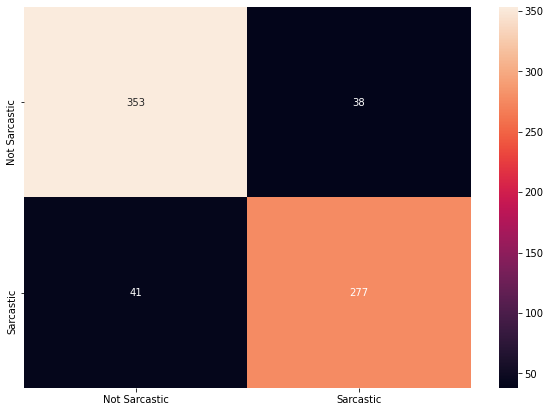

In [47]:
# Visualize 

df_cm = pd.DataFrame(cm, index = [i for i in ['Not Sarcastic','Sarcastic']],
                                  columns = [i for i in ['Not Sarcastic','Sarcastic']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt = '1g');

In [48]:
# The confusion matrix looks reasonably good, ready to predict on test datasets

In [49]:
# I will print 5 sentences & labels of testing dataset
    # Compare the labels with predictions

In [50]:
# Print sentences
test_data[10:15]

["the time i came out to my grandmother and she didn't die",
 'ecosystem sobered by how young species was when it went extinct',
 'supreme ruler of laundry room moves load of clothes from washer to top of washer',
 '15-year-old girl viciously torn apart by rabid pack of peers',
 'adam smith vs. ayn rand']

In [51]:
# Print labels
test_labels[10:15]

array([0, 1, 1, 1, 0])

In [52]:
# Predicting the labels for same 10 sentences

In [53]:
pred_5 = (model_1.predict(test_sequence_padded[10:15]) > 0.5).astype("int32")
pred_5

array([[0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [54]:
# All our predictions were correct for these 5 rows

# END OF PART 2